## Initial Data Preparation

In [143]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from  sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression



In [144]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [146]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### df.describe(include='O').T 
is used to get a summary of the categorical columns in a DataFrame. 
The describe() method in Pandas produces a table of summary statistics for each column in a DataFrame. The include='O' argument specifies that only the categorical columns should be included in the summary. The .T method transposes the DataFrame, so that the column names are in the rows and the summary statistics are in the columns.

In [147]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Customer ID
It is not an important feature, we will drop it

In [148]:
df.drop('customerID',axis=1,inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


## Total Charges
from description, it has white space in 11 rows, we need to handle it

In [149]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [150]:
p = df['TotalCharges']
df[p ==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [151]:
len(df[p==' '])

11

In [152]:
# Convert the "TotalCharges" column to numeric and enforce white spaces to be 'NaN'
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [153]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [154]:
len(df[df['TotalCharges']==' '])

0

In [155]:
df.TotalCharges.isnull().sum()

11

## Processing

## Some Cleaning

## SeniorCitizen
To be treated as category

In [156]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [157]:
df['SeniorCitizen'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: SeniorCitizen, dtype: object

## Handel messing values

In [158]:
# handel messing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

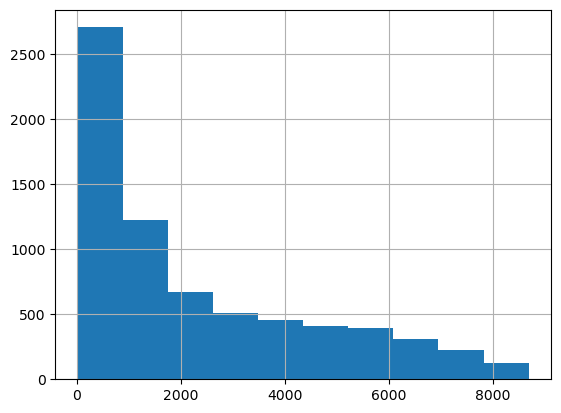

In [159]:
# step1: handel missing values in numrical variabel

df.TotalCharges.hist()



As the distribution of totalcharges is skewed, we can impute the missing values with its median
Median imputation is a better imputation method for skewed data because it is not as sensitive to outliers as mean imputation. The median is the middle value in a data set, so it is not affected by outliers. This makes median imputation a more robust imputation method than mean imputation.

In [160]:
# replace missing values with median
# Note: we calculated the median of totalcharges from the training set and it will be used for other sets

df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].isnull().sum()



0

In [161]:
df.TotalCharges.describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

## Handel Categorical Value

In [162]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['number']).columns.tolist()
print(categorical)
print('='*20)
print(numerical)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['tenure', 'MonthlyCharges', 'TotalCharges']


In [163]:
# convert categorical data inot numerical data
le= LabelEncoder()
 
df[categorical] =df[categorical].apply(lambda col: le.fit_transform(col.astype(str)))



## Scaling Numerical Variables 
Standard Scaler

In [164]:
print(numerical)
df[numerical].describe()

['tenure', 'MonthlyCharges', 'TotalCharges']


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [165]:
scaler = StandardScaler()
df[numerical]=scaler.fit_transform(df[numerical])
print(df[numerical])


        tenure  MonthlyCharges  TotalCharges
0    -1.277445       -1.160323     -0.994242
1     0.066327       -0.259629     -0.173244
2    -1.236724       -0.362660     -0.959674
3     0.514251       -0.746535     -0.194766
4    -1.236724        0.197365     -0.940470
...        ...             ...           ...
7038 -0.340876        0.665992     -0.128655
7039  1.613701        1.277533      2.243151
7040 -0.870241       -1.168632     -0.854469
7041 -1.155283        0.320338     -0.872062
7042  1.369379        1.358961      2.014288

[7043 rows x 3 columns]


## Data Splitting
### We split the full data into : ( Training Set, Validation Set, Testing Set)
- Training Set: to train our model
- Validation Set: to validate and tune the model(s)
- Testing Set: to evaluate the final model (after tuning and selecting the best one)

- The training set is the data that is used to train the model.
  The model learns to predict the output values for the input values in the training set.
  
  
- The test set is the data that is used to evaluate the performance
     of the model after it has been trained. The model is not allowed to
     see the test set during training, so it is a good way to see how well the model generalizes to new data.
     
     
- The validation set is a subset of the training set that is used
    to tune the hyperparameters of the model. Hyperparameters are the parameters 
    of the model that are not learned during training. The validation set is used to 
    see how well the model performs on data that it has not seen before. This helps to prevent overfitting,
    which is when the model learns the training data too well and does not generalize well to new dat

In [166]:
df_full_train , df_test = train_test_split(df , test_size=0.2 ,random_state = 1)
df_train , df_valid = train_test_split( df_full_train , test_size=0.2 , random_state = 1 )

print(f"training Data size : {df_train.shape}")
print(f"validation Data size : {df_valid.shape}")
print(f"Testing Data size : {df_test.shape}")

training Data size : (4507, 20)
validation Data size : (1127, 20)
Testing Data size : (1409, 20)


In [167]:
x_train= df_train.drop('Churn',axis=1)
y_train = df_train['Churn']

x_valid=df_valid.drop('Churn',axis=1)
y_valid=df_valid['Churn']


x_test=df_test.drop('Churn',axis=1)
y_test = df_test['Churn']


In [168]:
print(x_train[numerical])

        tenure  MonthlyCharges  TotalCharges
2678 -0.096554       -1.497668     -0.731473
5594 -0.381597        0.631094     -0.190705
4077 -0.748080        1.031587     -0.413056
4758  0.962175       -1.497668     -0.543028
4445  1.247218        1.104706      1.737900
...        ...             ...           ...
3774  0.799294        0.534710      0.793619
6108 -0.585198       -1.316532     -0.796923
1530 -1.236724        0.838819     -0.923517
3701 -0.218715       -1.338135     -0.671035
4368 -0.951682        0.534710     -0.675582

[4507 rows x 3 columns]


## Modeling

### Logistic Regression in breif
- Logistic regression is a linear model, but unlike linear regression, it’s a classification model


- The output of logistic regression is probability; 
  the probability that the observation is positive, or, in other words,
  the probability that y = 1. For our case, it’s the probability that the customer will churn.
  
  
- To be able to treat the output as a probability, we need to 
  make sure that the predictions of the model always stay between
  zero and one. We use a special mathematical function for this purpose called sigmoid,
  and the full formula for the logistic regression model is:
  
  g(z) = 1 /(1+ e ^ -z)  where z = w * x + b


- The sigmoid function maps any value to a number between zero and one.

## Applying Logistic Regression

In [169]:
log_reg = LogisticRegression(solver='liblinear',random_state=1)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [170]:

y_valid_pred=log_reg.predict_proba(x_valid)
print(y_valid_pred)

# will return a NumPy array of probabilities. The array will have two columns, one for 
# the probability of the positive class and one for the probability of the negative class.



[[0.99300627 0.00699373]
 [0.78894728 0.21105272]
 [0.777351   0.222649  ]
 ...
 [0.96575956 0.03424044]
 [0.42517778 0.57482222]
 [0.70648453 0.29351547]]


In [171]:
y_test_pred = log_reg.predict_proba(x_test)
y_test_pred

array([[0.94401459, 0.05598541],
       [0.90624889, 0.09375111],
       [0.65810784, 0.34189216],
       ...,
       [0.99507177, 0.00492823],
       [0.81308083, 0.18691917],
       [0.40625255, 0.59374745]])

In [172]:
y_test_pred[:,1]



array([0.05598541, 0.09375111, 0.34189216, ..., 0.00492823, 0.18691917,
       0.59374745])

### Note
- This output (probabilities) is often called soft predictions. These tell us the probability of churning as a number between zero and one. It’s up to us to decide how to interpret this number and how to use it.

- To get the binary predictions, hard predictions, we take the probabilities and cut them above a certain threshold

In [173]:
y_test_pred[:,1] > 0.5

array([False, False, False, ..., False, False,  True])

In [174]:
y_test_pred = (y_test_pred[:,1] > 0.5).astype('int')
print(y_test_pred)

[0 0 0 ... 0 0 1]


In [175]:
y_pred= log_reg.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [176]:
y_test_pred == y_test

3381    True
6180    True
4829    True
3737    True
4249    True
        ... 
2563    True
2028    True
2899    True
3474    True
5154    True
Name: Churn, Length: 1409, dtype: bool

In [178]:
print('LogisticRegression Training Accuracy: ', round(log_reg.score(x_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(log_reg.score(x_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(log_reg.score(x_test, y_test), 2))

LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.81
LogisticRegression Testing Accuracy:  0.81
